# Pythonスクリプトをjupyter notebook上で実行する

## このセッションで学べること
- Pythonスクリプトをjupyter notebook上で書くことができる  
- Pythonスクリプトをjupyter notebook上で実行することができる  
- 手書き文字のデータセットが理解できる（画像データの構成が理解できる）
- 手書き文字のデータセットを使って、SVMの他クラス分類の手法が理解できる  
　https://ja.wikipedia.org/wiki/サポートベクターマシン  
　https://qiita.com/pesuchin/items/c55f40b69aa1aec2bd19  
- 関数を表現できるようになる  
- 交差検証の概念が理解できる  
　https://bi.biopapyrus.jp/ai/machine-learning/k-fold-cross-validation.html  
　http://aiweeklynews.com/archives/50219779.html  
 ******

データセットの点数: 1797
各データの次元数: 64


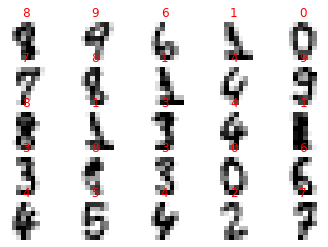

正答率: 97.44%


In [2]:
#Pythonスクリプトを実行する
%run -i digits_svm.py

### 演習問題
- スクリプトを読み解いてみよう！
- パラメータをいろいろと変えてみて、正答率の変化を見てみよう！
- 新規の手書き文字データ（配列）を作って、分類してみよう！

### おまけ

### コマンドで実行する場合
1. コマンドプロンプト（ターミナル）を開く
1. cdで実行するスクリプトのあるディレクトリまで移動
1. pytho3 ファイル名

In [2]:
#エラーが起きたスクリプトの対処法
%run -i digits_svm_old.py

ImportError: cannot import name 'cross_validation'

### エラー処理の仕方
cross_validationクラスがmodel_selectionクラスに変更<br>
https://scikit-learn.org/stable/whats_new.html

sklearn.model_selection.KFoldの使い方<br>
https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html#sklearn.model_selection.KFold

In [1]:
# !の後にshell comandが実行できる %でも代用できるっぽい
!ls -lt

total 64
-rw-r--r--  1 moritadashi  staff  16575 Sep 26 15:36 Python_Script_Run.ipynb
-rw-r--r--  1 moritadashi  staff   2160 Sep 26 15:35 Python_Script_Run_practice.ipynb
-rw-r--r--  1 moritadashi  staff   2186 Sep 26 13:08 digits_svm_old.py
-rw-r--r--@ 1 moritadashi  staff   2380 Sep 26 13:05 digits_svm.py


In [2]:
# reference of magic comand
%quickref

### Markdown記法　サンプル集
https://qiita.com/tbpgr/items/989c6badefff69377da7

In [8]:
from matplotlib import pyplot as plt
from matplotlib import cm
%matplotlib inline

データセットの点数: 1797
各データの次元数: 64


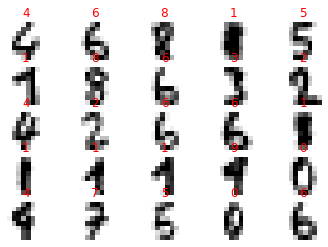

正答率: 97.44%


In [10]:
%run -i practice.py

In [11]:
#必要なライブラリを読み込む
from matplotlib import pyplot as plt
from matplotlib import cm
%matplotlib inline 

import numpy as np
from sklearn import datasets

#from sklearn import cross_validation 
from sklearn import model_selection # modify  2019.9.22
from sklearn import svm
from sklearn import metrics

In [12]:
#SVMアルゴリズムと交差検証法を用いて、学習・評価する関数を定義する
def digits_svm(X,y):
    scores = []
    # K-fold 交差検証でアルゴリズムの汎化性能を調べる
    
    # modify  2019.9.22
    #kfold = cross_validation.KFold(len(X), n_folds=5)
    #for train, test in kfold(X):
    kfold = model_selection.KFold(n_splits=5)
    for train, test in kfold.split(X):
        # デフォルトのカーネルは rbf になっている
        model = svm.SVC(C=2**2, gamma=2**-11)
        # 訓練データで学習する
        model.fit(X[train], y[train])
        # テストデータの正答率を調べる
        score = metrics.accuracy_score(model.predict(X[test]), y[test])
        scores.append(score)

    # 最終的な正答率を出す
    accuracy = (sum(scores) / len(scores)) * 100
    msg = '正答率: {accuracy:.2f}%'.format(accuracy=accuracy)
    print(msg)

In [13]:
#main関数を定義する
def main():
    digits = datasets.load_digits()
    X = digits.data
    y = digits.target

    print('データセットの点数: {N}'.format(N=X.shape[0]))
    print('各データの次元数: {dimension}'.format(dimension=X.shape[1]))

    # データの中から 25 点を無作為に選び出す
    #p = np.random.random_integers(0, len(X), 25)
    p = np.random.randint(0, len(X), 25)

    # 選んだデータとラベルを matplotlib で表示する
    samples = np.array(list(zip(X, y)))[p]
    for index, (data, label) in enumerate(samples):
        # 画像データを 5x5 の格子状に配置する
        plt.subplot(5, 5, index + 1)
        # 軸に関する表示はいらない
        plt.axis('off')
        # データを 8x8 のグレースケール画像として表示する
        plt.imshow(data.reshape(8, 8), cmap=cm.gray_r, interpolation='nearest')
        # 画像データのタイトルに正解ラベルを表示する
        plt.title(label, color='red')

    # グラフを表示する
    plt.show()
    
    # svmで分類する
    digits_svm(X,y)

データセットの点数: 1797
各データの次元数: 64


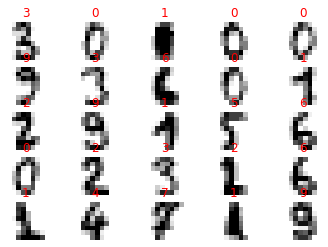

正答率: 97.44%


In [14]:
main()